# **Projek Prediksi Banjir**

Banjir merupakan salah satu bencana alam yang sering terjadi di berbagai wilayah, termasuk Indonesia, dan dapat menyebabkan kerugian signifikan baik secara material maupun non-material. Keterlambatan dalam mendeteksi potensi banjir seringkali memperparah dampak yang ditimbulkan. Oleh karena itu, pengembangan sistem prediksi banjir yang akurat dan tepat waktu menjadi sangat penting. Dengan memanfaatkan data historis ketinggian air dari berbagai pos pemantauan, kita dapat membangun model machine learning yang mampu memberikan peringatan dini akan potensi terjadinya banjir. Proyek ini bertujuan untuk membuat model predictive analytics untuk memprediksi status banjir berdasarkan data-data tersebut.

LINK DATASET (KAGGLE) :
https://www.kaggle.com/datasets/asfilianova/dataset-banjir

# **Import Library**

Mengimpor library yang akan digunakan

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Disini semua library yang akan (dan yang mungkin akan) digunakan semuanya diimport sehingga dapat mempermudah kita dalam melakukan tahapan selanjutnya

# **Data Loading dan Cleaning**

Memuat file dataset dan menampilkannya menggunakan .head()
Disini kita akan menggunakan kolom 'Status Banjir' sebagai Target

In [4]:
import pandas as pd

# Muat file
dataset = 'pemetaan_daerah_banjir.csv'

# Baca file CSV dari URL
data = pd.read_csv(dataset)

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
data.head()

,Tanggal,Waktu,Katulampa,Pos Depok,Manggarai,Istiqlal,Jembatan Merah,Flusing Ancol,Marina Ancol,Status Banjir,Unnamed: 10,Unnamed: 11
0,1/1/2020,0:00:00,47,167,639.0,206.0,164.0,180.0,159.0,0,NaN,NaN
1,1/1/2020,1:00:00,44,75,680.0,215.0,175.0,181.0,114.0,0,NaN,NaN
2,1/1/2020,2:00:00,42,159,735.0,187.0,192.0,197.0,169.0,0,Keterangan,NaN
3,1/1/2020,3:00:00,41,161,845.0,238.0,223.0,203.0,178.0,0,NaN,SIAGA 1
4,1/1/2020,4:00:00,40,154,889.0,280.0,262.0,223.0,191.0,1,NaN,SIAGA 2


Berdasarkan tampilan .head(), kita memiliki kolom Tanggal,	Waktu,	Katulampa,	Pos Depok,	Manggarai,	Istiqlal,	Jembatan Merah,	Flusing Ancol,	Marina Ancol,	Status Banjir,	Unnamed: 10, dan	Unnamed: 11

Beberapa diantaranya mungkin akan di drop, kolom 'Status Banjir' juga merupakan kolom yang paling memungkinkan untuk kita jadikan fitur target

Menampilkan informasi umum tentang dataset

In [5]:
print("\nInformasi dataset:")
data.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tanggal         624 non-null    object 
 1   Waktu           624 non-null    object 
 2   Katulampa       624 non-null    int64  
 3   Pos Depok       624 non-null    int64  
 4   Manggarai       623 non-null    float64
 5   Istiqlal        622 non-null    float64
 6   Jembatan Merah  619 non-null    float64
 7   Flusing Ancol   623 non-null    float64
 8   Marina Ancol    623 non-null    float64
 9   Status Banjir   624 non-null    int64  
 10  Unnamed: 10     4 non-null      object 
 11  Unnamed: 11     3 non-null      object 
dtypes: float64(5), int64(3), object(4)
memory usage: 58.6+ KB


Lihat terlebih dahulu tipe data dari setiap kolom untuk memudahkan kita dilangkah berikutnya.

Cek missing values

In [6]:
print("\nMissing values per fitur:")
print(data.isnull().sum())


Missing values per fitur:
Tanggal             0
Waktu               0
Katulampa           0
Pos Depok           0
Manggarai           1
Istiqlal            2
Jembatan Merah      5
Flusing Ancol       1
Marina Ancol        1
Status Banjir       0
Unnamed: 10       620
Unnamed: 11       621
dtype: int64


Menghapus Kolom 11 dan 12 karena tidak relevan dan memiliki nilai null yang sangat-sangat banyak. Kolom Tanggal dan Waktu juga akan di drop karena dirasa tidak relevan

In [7]:
# Hapus kolom 'Unnamed: 10', 'Unnamed: 10', 'Tanggal', 'Waktu'
data = data.drop(columns=['Unnamed: 10', 'Unnamed: 11', 'Tanggal', 'Waktu'])

# Tampilkan DataFrame untuk memastikan kolom telah dihapus
data.head()

,Katulampa,Pos Depok,Manggarai,Istiqlal,Jembatan Merah,Flusing Ancol,Marina Ancol,Status Banjir
0,47,167,639.0,206.0,164.0,180.0,159.0,0
1,44,75,680.0,215.0,175.0,181.0,114.0,0
2,42,159,735.0,187.0,192.0,197.0,169.0,0
3,41,161,845.0,238.0,223.0,203.0,178.0,0
4,40,154,889.0,280.0,262.0,223.0,191.0,1


Kolom-kolom yang sebelumnya sudah dihapus membuat data yang dimiliki berbentuk 'numeric' secara seutuhnya, sehingga tidak perlu dilakukan 'labelEncoder'

In [8]:
#melakukan imputasi pada data yang kosong
cols_to_impute = ['Manggarai', 'Istiqlal', 'Jembatan Merah', 'Flusing Ancol', 'Marina Ancol']
for col in cols_to_impute:
    if data[col].isnull().any():
        median_val = data[col].median()
        data[col].fillna(median_val, inplace=True)
        print(f"Missing values di '{col}' diisi dengan median: {median_val}")

print("\nMissing values setelah imputasi:")
print(data.isnull().sum())

Missing values di 'Manggarai' diisi dengan median: 650.0
Missing values di 'Istiqlal' diisi dengan median: 212.0
Missing values di 'Jembatan Merah' diisi dengan median: 166.0
Missing values di 'Flusing Ancol' diisi dengan median: 190.0
Missing values di 'Marina Ancol' diisi dengan median: 183.0

Missing values setelah imputasi:
Katulampa         0
Pos Depok         0
Manggarai         0
Istiqlal          0
Jembatan Merah    0
Flusing Ancol     0
Marina Ancol      0
Status Banjir     0
dtype: int64


<ipython-input-8-d6d0a9862a7f>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_val, inplace=True)


Walaupun tidak seberapa, akan kita imputasi (isi) data yang kosong dengan nilai median

# **EDA**

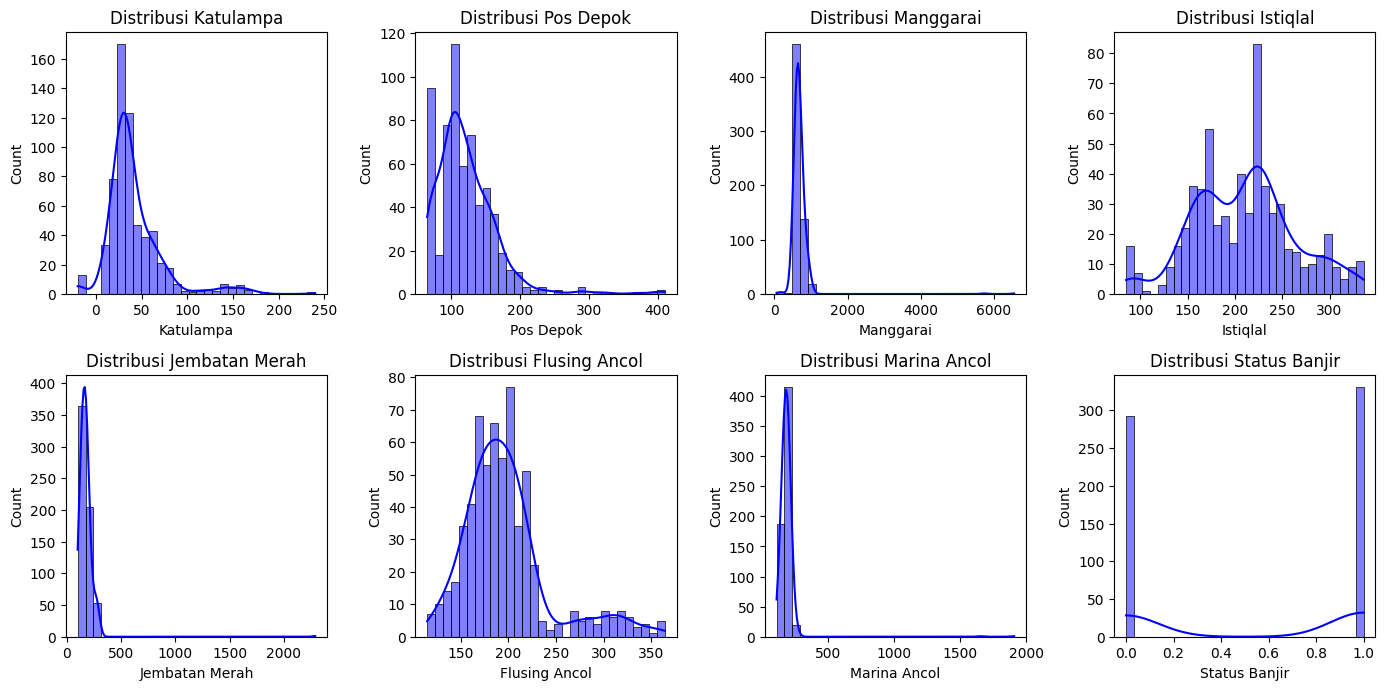

In [9]:
# Distribusi fitur numerik
num_features = data.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

Disini dilakukan pemeriksaan rentang nilai dari data yang ada pada setiap fitur numerik. Hasilnya seperti yang ada pada histogram diatas

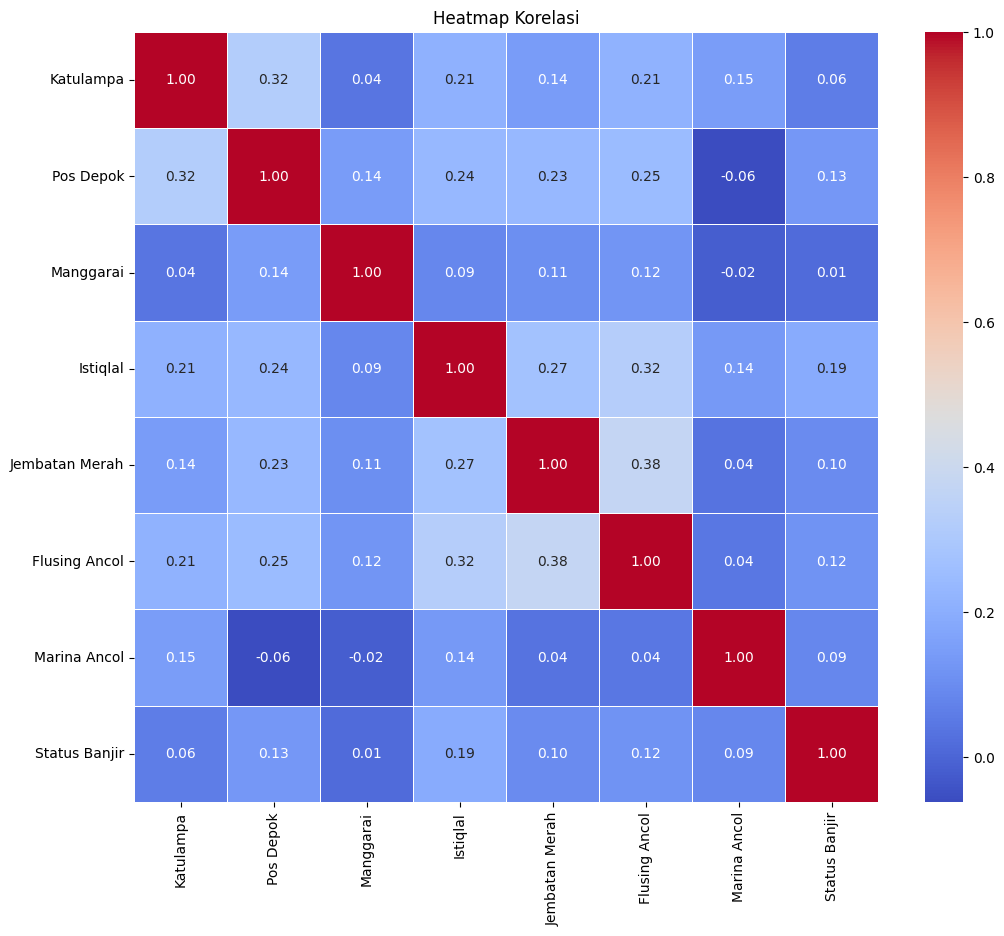

In [10]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

Disini korelasi menggunakan Heatmap digunakan supaya dapata memmberikan gambaran terhadap hubungan dari setiap fitur.

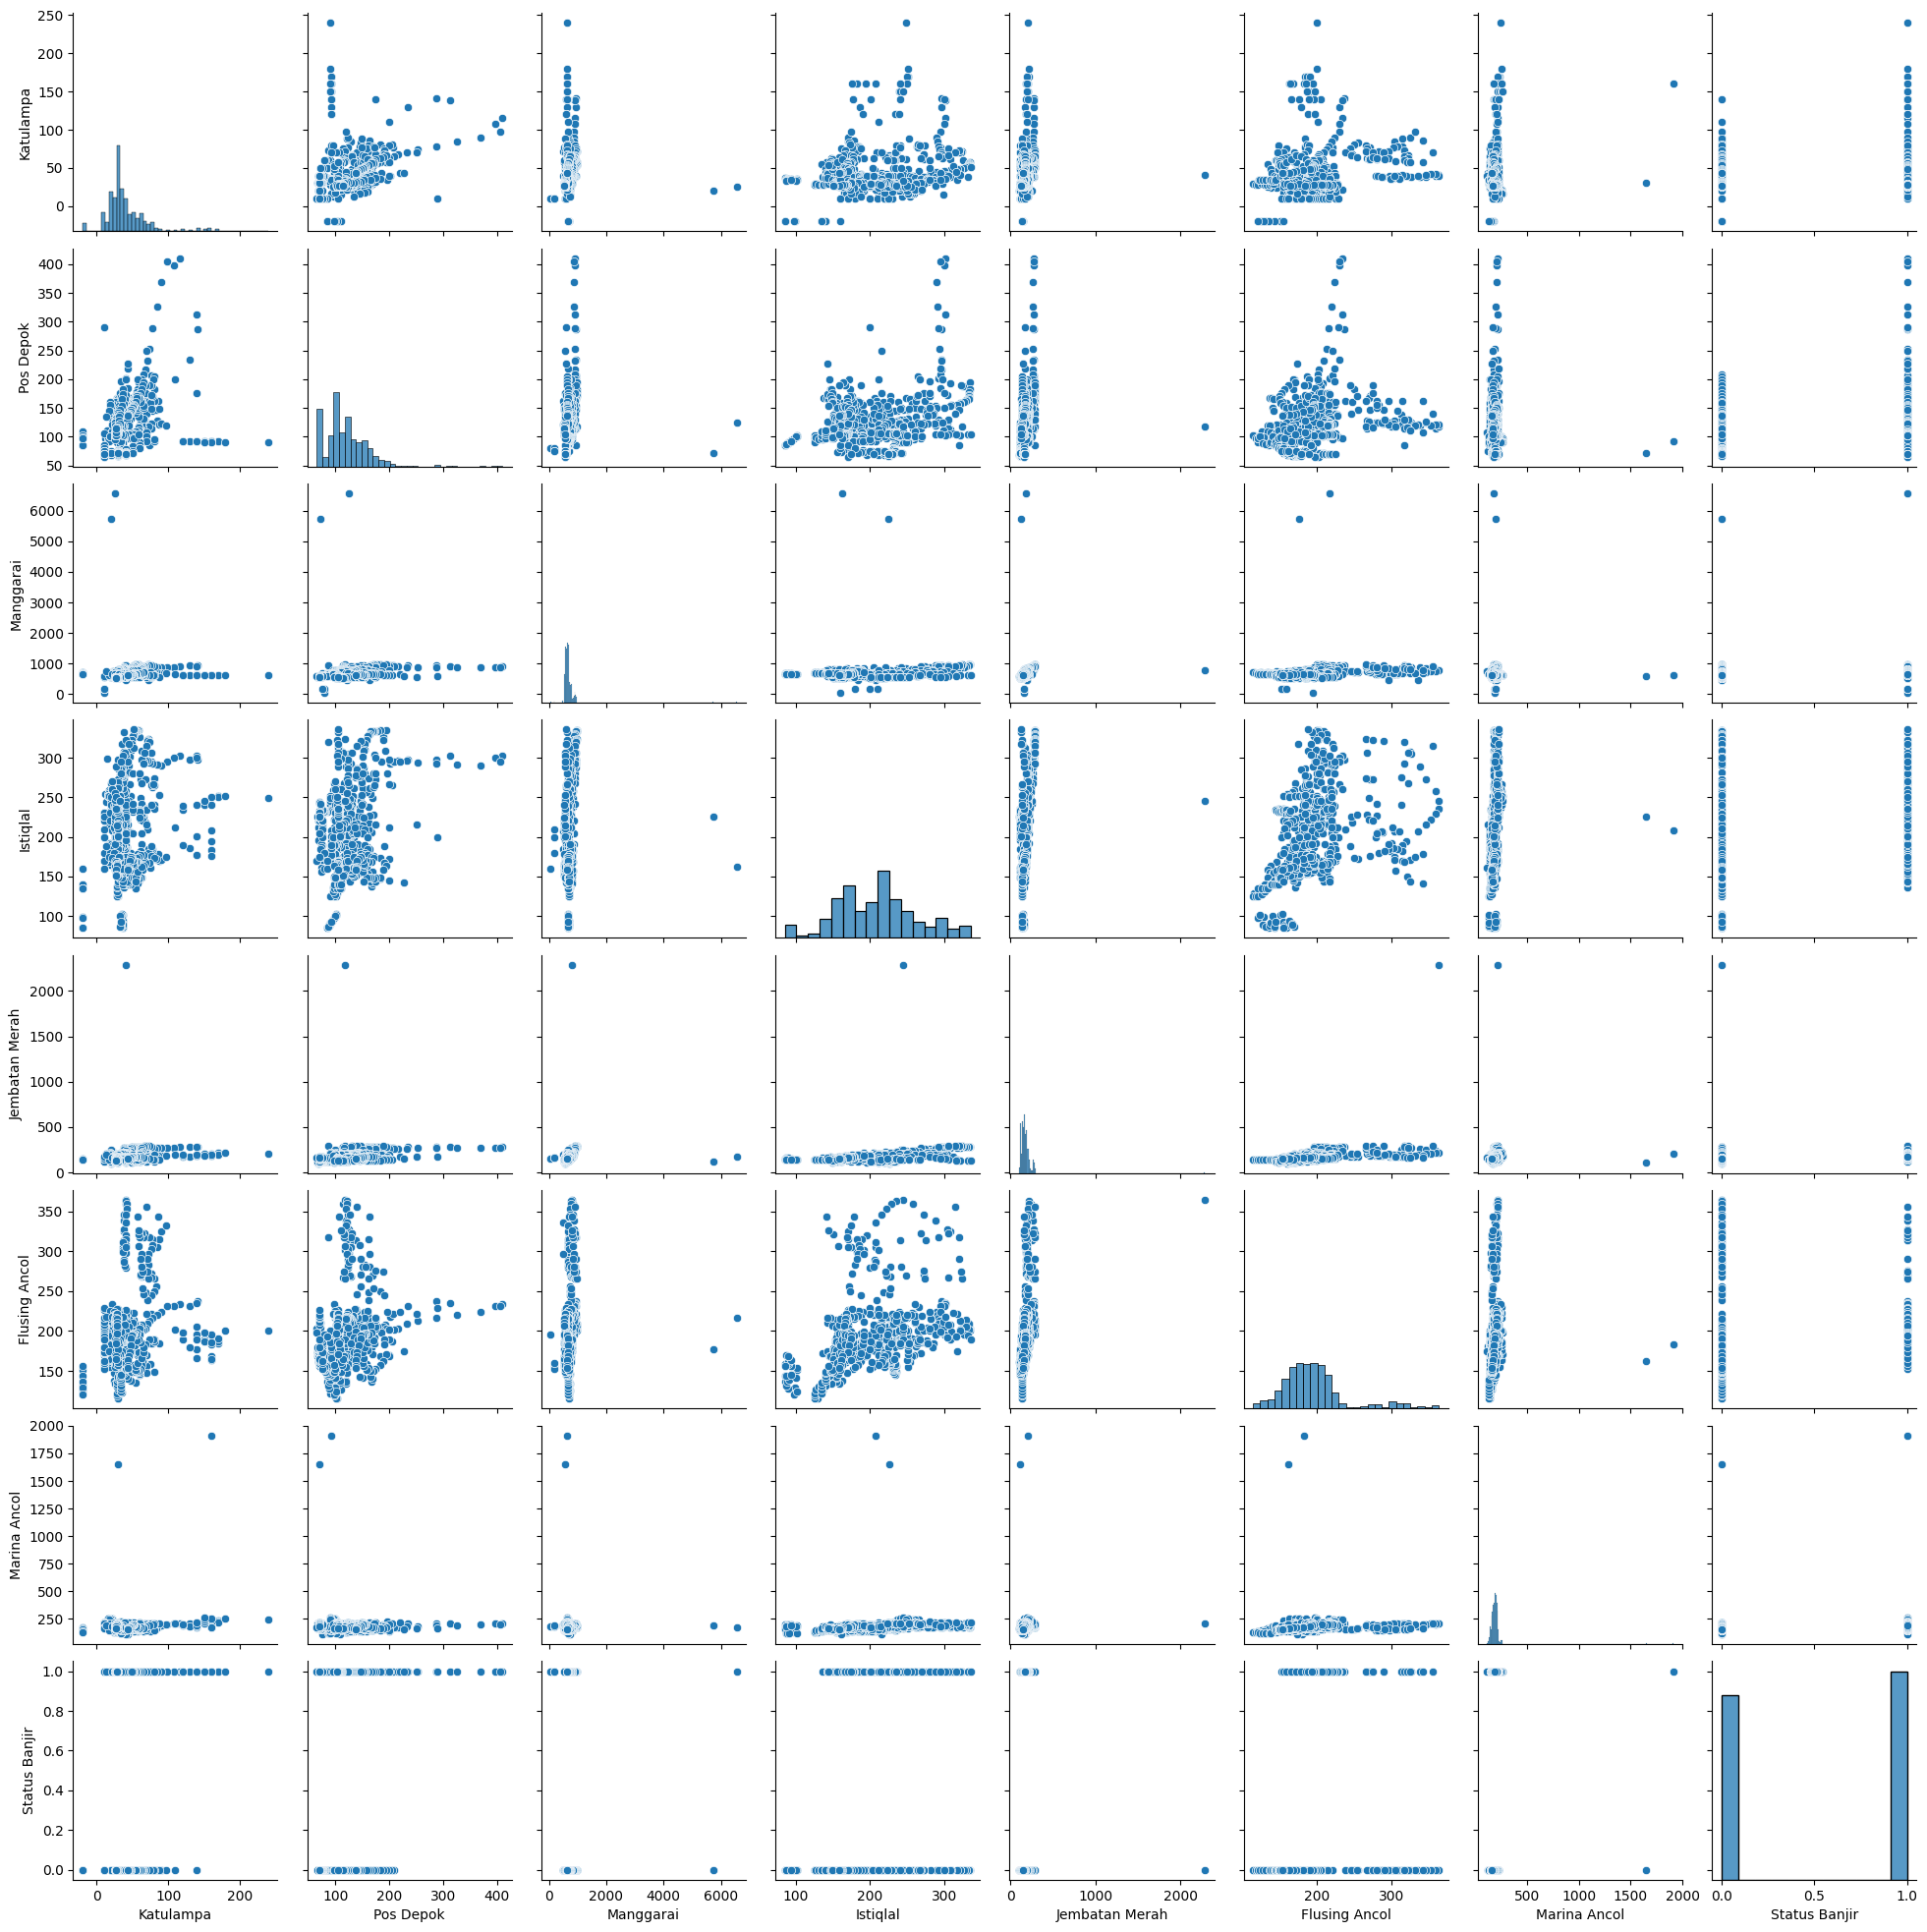

In [11]:
# Pairplot untuk fitur numerik
sns.pairplot(num_features)
plt.show()

Pemeriksaan data 'Outlier' pada dataset juga dilakukan menggunakan Pairplot, namun untuk sekarang kita abaikan terlebih dahulu

<ipython-input-12-33f3f67356d2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status Banjir', data=data, palette='viridis')


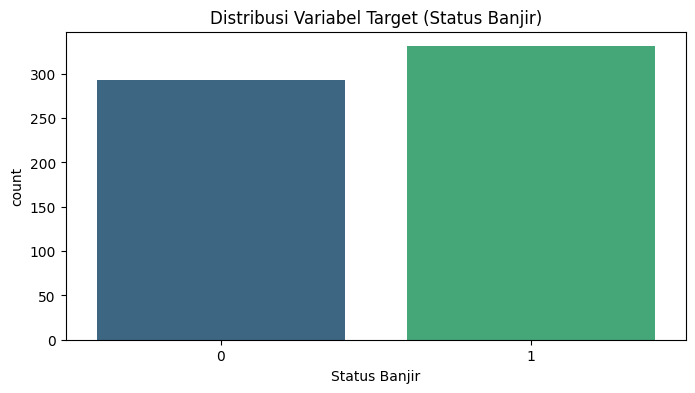

In [12]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 4))
sns.countplot(x='Status Banjir', data=data, palette='viridis')
plt.title('Distribusi Variabel Target (Status Banjir)')
plt.show()

Perbandingan fitur target juga dilihat agar dapat dinilai apakah data seimbang atau tidak, harapannya tidak terjadi bias pada data apabila tidak seimbang

# **Data Splitting**

In [13]:
# Pisahkan fitur (X) dan target (y) TERLEBIH DAHULU
X = data.drop(columns=['Status Banjir'])
y = data['Status Banjir']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Buat instance MinMaxScaler
scaler = MinMaxScaler()

numeric_columns_train = X_train.columns
numeric_columns_test = X_test.columns

# Fit scaler
X_train[numeric_columns_train] = scaler.fit_transform(X_train[numeric_columns_train])

# Transformasikan data uji (X_test) menggunakan scaler yang sudah di-fit dari data latih
X_test[numeric_columns_test] = scaler.transform(X_test[numeric_columns_test])

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(499, 7), y_train=(499,)
Test set shape: X_test=(125, 7), y_test=(125,)


Data dibagi menjadi variabel fitur (X) dan variabel target (y, yaitu 'Status Banjir').
Selanjutnya, dataset fitur (X) dan target (y) dibagi menjadi data latih (80%) dan data uji (20%) menggunakan `train_test_split` dari `sklearn.model_selection`. Parameter `stratify=y` digunakan untuk memastikan proporsi kelas target seimbang di kedua set.
Setelah pembagian, dilakukan normalisasi pada fitur-fitur numerik menggunakan `MinMaxScaler`. Penting untuk dicatat bahwa scaler di-'fit' *hanya* pada `X_train` (data latih) untuk mempelajari parameter skala (minimum dan maksimum). Kemudian, `X_train` dan `X_test` (data uji) keduanya ditransformasi menggunakan scaler yang telah di-'fit' tersebut. Pendekatan ini mencegah kebocoran informasi dari data uji ke dalam proses training.

# **Model Deployment**

In [14]:
# Part 1: Model Training
# Train each classifier separately
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(random_state=42)
nb = GaussianNB()

knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Disini digunakan beberapa model yang pernah dipelajari sebelumnya untuk mengetahui performa model mana yang paling baik

# **Model Evaluation**

## **KNN**

==== KNN Classifier ====
Confusion Matrix:
[[54  5]
 [10 56]]
True Positive (TP): 56
False Positive (FP): 5
False Negative (FN): 10
True Negative (TN): 54
Accuracy: 0.8800
Precision: 0.9180
Recall: 0.8485
F1-Score: 0.8819

----------------------------------------



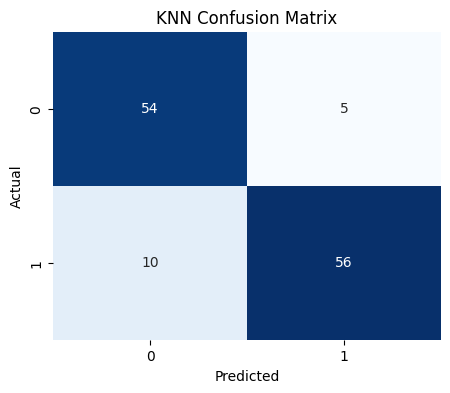

In [15]:
# K-Nearest Neighbors (KNN)
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = cm_knn.ravel()
print("==== KNN Classifier ====")
print("Confusion Matrix:")
print(cm_knn)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model dengan benar memprediksi 60 kejadian sebagai "Tidak Banjir". Presisi untuk kelas "Banjir" adalah 87.04%, menunjukkan bahwa dari semua yang diprediksi banjir, 87.04% di antaranya memang benar banjir. Recall sebesar 81.03% menandakan bahwa model ini berhasil mengidentifikasi 81.03% dari semua kejadian banjir yang sebenarnya. F1-Score, yang merupakan rata-rata harmonik dari presisi dan recall, adalah 83.93%.

## **Decision Tree**

==== Decision Tree Classifier ====
Confusion Matrix:
[[51  8]
 [10 56]]
True Positive (TP): 56
False Positive (FP): 8
False Negative (FN): 10
True Negative (TN): 51
Accuracy: 0.8560
Precision: 0.8750
Recall: 0.8485
F1-Score: 0.8615

----------------------------------------



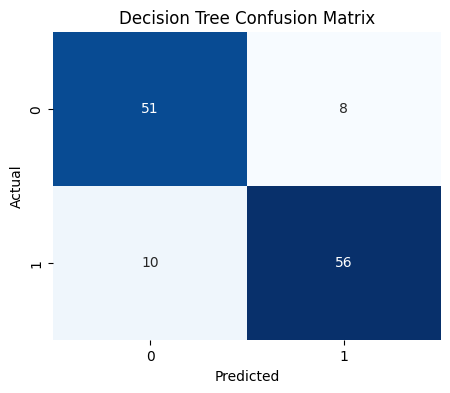

In [16]:
y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
tn, fp, fn, tp = cm_dt.ravel()
print("==== Decision Tree Classifier ====")
print("Confusion Matrix:")
print(cm_dt)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model ini memiliki presisi yang sangat baik sebesar 92.16% untuk kelas "Banjir", artinya prediksi "Banjir" dari model ini sangat bisa diandalkan. Recall-nya sama dengan KNN yaitu 81.03%, yang menunjukkan kemampuan yang serupa dalam menemukan kasus banjir aktual. F1-Score mencapai 86.24%, mengindikasikan keseimbangan yang baik antara presisi dan recall.

## **Random Forest**

==== Random Forest Classifier ====
Confusion Matrix:
[[53  6]
 [ 6 60]]
True Positive (TP): 60
False Positive (FP): 6
False Negative (FN): 6
True Negative (TN): 53
Accuracy: 0.9040
Precision: 0.9091
Recall: 0.9091
F1-Score: 0.9091

----------------------------------------



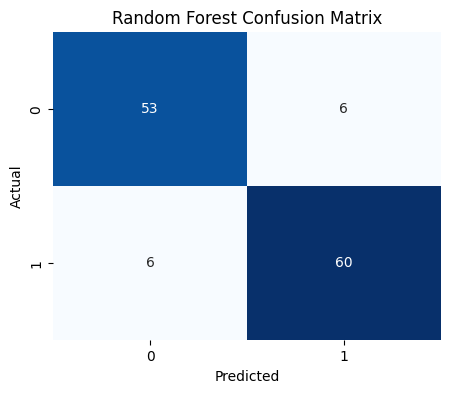

In [17]:
# Random Forest
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm_rf.ravel()
print("==== Random Forest Classifier ====")
print("Confusion Matrix:")
print(cm_rf)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Presisi model ini adalah 89.29%, yang sangat baik. Recall-nya juga tinggi, yaitu 86.21%, menunjukkan bahwa model ini baik dalam mengidentifikasi kasus "Banjir" yang sebenarnya dan juga akurat dalam prediksinya. F1-Score sebesar 87.72% adalah yang tertinggi, menandakan performa keseluruhan yang paling seimbang dan baik. Jumlah False Negatives (8) adalah yang terendah dibandingkan model lain.

## **Support Vector Machine (SVM)**

==== SVM Classifier ====
Confusion Matrix:
[[48 11]
 [11 55]]
True Positive (TP): 55
False Positive (FP): 11
False Negative (FN): 11
True Negative (TN): 48
Accuracy: 0.8240
Precision: 0.8333
Recall: 0.8333
F1-Score: 0.8333

----------------------------------------



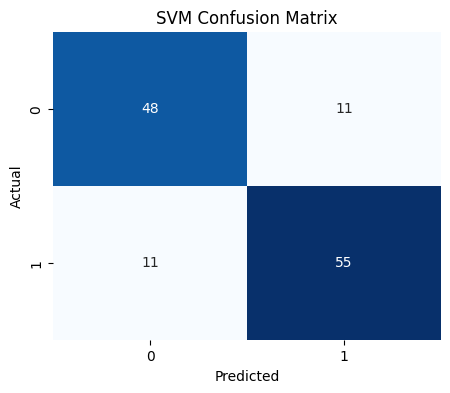

In [18]:
# Support Vector Machine (SVM)
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
tn, fp, fn, tp = cm_svm.ravel()
print("==== SVM Classifier ====")
print("Confusion Matrix:")
print(cm_svm)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Presisi model ini adalah 76.81%. Yang menonjol dari SVM adalah nilai recall yang sangat tinggi yaitu 91.38%, yang berarti model ini sangat baik dalam mendeteksi hampir semua kejadian banjir yang sebenarnya, meskipun dengan konsekuensi False Positives yang lebih tinggi (16). F1-Score sebesar 83.46% menunjukkan performa yang baik, terutama didorong oleh recall yang tinggi.
5. Naive Bayes Classifier

## **Naive Bayes**

==== Naive Bayes Classifier ====
Confusion Matrix:
[[44 15]
 [32 34]]
True Positive (TP): 34
False Positive (FP): 15
False Negative (FN): 32
True Negative (TN): 44
Accuracy: 0.6240
Precision: 0.6939
Recall: 0.5152
F1-Score: 0.5913

----------------------------------------



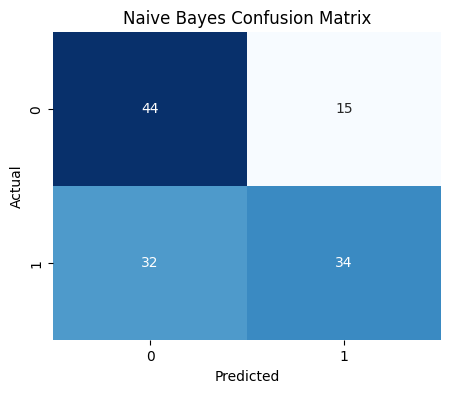

In [19]:
# Naive Bayes
y_pred_nb = nb.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)
tn, fp, fn, tp = cm_nb.ravel()
print("==== Naive Bayes Classifier ====")
print("Confusion Matrix:")
print(cm_nb)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Presisi model ini adalah 58.43%. Meskipun recall-nya cukup tinggi (89.66%), yang berarti mampu mengidentifikasi sebagian besar kasus banjir aktual, tingginya angka False Positives (37) sangat menurunkan presisi dan akurasi keseluruhannya. F1-Score sebesar 70.75%.

# **Rangkuman Hasil**

In [20]:
# Function to evaluate and return results as a dictionary
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

# Evaluate each model and collect results
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Create a DataFrame to summarize results
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Populate the DataFrame with results
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Convert list of dictionaries to DataFrame
summary_df = pd.DataFrame(rows)

# Display the summary DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)     0.880   0.918033  0.848485  0.881890
1            Decision Tree (DT)     0.856   0.875000  0.848485  0.861538
2            Random Forest (RF)     0.904   0.909091  0.909091  0.909091
3  Support Vector Machine (SVM)     0.824   0.833333  0.833333  0.833333
4              Naive Bayes (NB)     0.624   0.693878  0.515152  0.591304
